# Facial Recognition using Convolutional Neural Network (CNN)

> CNN is a neural network typically composed of two components, one component for extracting useful features of the data, and another for performing a ML task (like classification based on the featurized data)

- toc: false
- badges: true
- comments: true
- categories: [image-analytics, cnn, classification, fully connected, convolutional neural network, faces-dataset]
- image: images/facial_recognition.png

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings

In [2]:
# notebook settings
%matplotlib inline
warnings.filterwarnings('ignore')

# set the random seed to make the experiment reproducible 
random_seed = 1
np.random.seed(random_seed)

## Working with Faces Image Data: CNNs

Convolutional Neural Network (CNN) is  especially suited for feature extraction of image data. A CNN is a neural network typically composed of two components, one component for extracting useful features of the data, and another for performing a ML task (like classification based on the featurized data). We will also compare the performances and number of parameteres between Fully-Connected NNs (FCNNs) and CNNs. 

In this article we also obtain and visualize how to obtain weight parameters for convolutional layer and outputs of convolution and MaxPooling Layer. Visualizing helps us enhance our interpretability of how the images are changing when passing through different layers and cnn model is training on image dataset. 

In [3]:
# image shape
image_shape = (64, 64)

# load faces data
faces_dataset = fetch_olivetti_faces(shuffle=True, random_state=random_seed)
faces = faces_dataset.data
n_samples, n_features = faces.shape

# function to visualize images
def plot_face(ax, img, image_shape):
    vmax = max(img.max(), -img.min())
    ax.imshow(img.reshape(image_shape), cmap=plt.cm.gray,
              interpolation='nearest',
              vmin=-vmax, vmax=vmax)
    return ax

In [4]:
labels = faces_dataset.target
# take images from only two individuals
X_flat = faces[(labels == 0) | (labels == 1)]
X = X_flat.reshape((20, 64, 64, 1))
Y = labels[(labels == 0) | (labels == 1)]

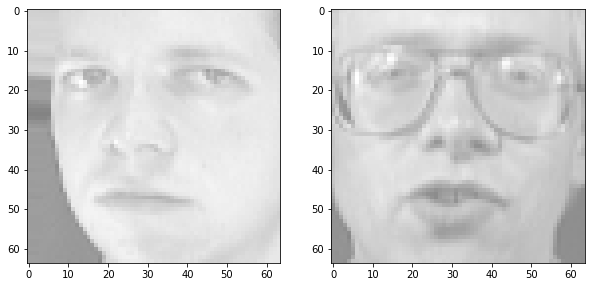

In [5]:
# we plot two sample images from the data set
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0] = plot_face(ax[0], X[Y == 0][0], image_shape)
ax[1] = plot_face(ax[1], X[Y == 1][0], image_shape)
plt.show()

## I. Classification with a FNN

**Task #1:** Build a shallow FNN to classify the face images. 
1. Only one hidden layer and its hidden layer size is 4
2. Activation function is set to be relu

In [6]:
# fix a width that is suited for image data (play with this)
input_dim = X_flat.shape[1]
H = input_dim
hidden_size = 4
# create sequential multi-layer perceptron
FCNN = Sequential()
#input layer
FCNN.add(Input(shape=(input_dim, )))
#hidden layer
FCNN.add(Dense(hidden_size, activation='relu', name='hidden_layer'))
#binary classification, one output
FCNN.add(Dense(1, activation='sigmoid', name='Classification_output_layer'))
# configure the model
FCNN.compile(loss='binary_crossentropy',metrics=['acc'])

Metal device set to: Apple M1 Pro


2022-03-04 16:00:00.800254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-04 16:00:00.800357: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### What is the number of parameters in the above FCNN architecture?

In [7]:
## your answer
FCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 4)                 16388     
                                                                 
 Classification_output_layer  (None, 1)                5         
  (Dense)                                                        
                                                                 
Total params: 16,393
Trainable params: 16,393
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = FCNN.fit(X_flat, Y, epochs=20, batch_size=5, verbose=0)

2022-03-04 16:00:00.881198: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-04 16:00:01.041286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
# evaluate the training and testing performance of your model 
score = FCNN.evaluate(X_flat, Y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.6931478381156921
Train accuracy: 0.5


2022-03-04 16:00:01.516562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## II. Classification with a CNN

**Task #2:** Build a CNN with one convolutional layer, one maxpooling layer and one dense layer to classify the face images. What are some theoretical strengths and drawbacks of using CNN versus MLP for handling image data? 

1. Kernel Size, Stride Size and number of filters for Conv2D layer is specified as below. The activation function is relu
2. The pooling size is 4 by 4 for maxpooling Layer

Other hyper-parameters in neural networks are set to be default.

In [10]:
# kernel size
kernel_size = (8, 8)
# stride size
stride_size = (1, 1)
# number of filters
filters = 4

cnn_model = Sequential()
cnn_model.add(Input(shape=(64, 64, 1)))
# feature extraction layer 0: convolution
cnn_model.add(Conv2D(filters, kernel_size=kernel_size, activation='relu', strides=stride_size))
# feature extraction layer 1: max pooling
cnn_model.add(MaxPooling2D(pool_size=(4,4)))
# classification layer 2: flattening
cnn_model.add(Flatten())
# classification layer 3: dense non-linear transformation
cnn_model.add(Dense(4, activation='relu', name='Relu_Non_linear'))
# classification layer 4: output label probability
cnn_model.add(Dense(1, activation='sigmoid', name = 'Output_label_probability'))
# configure the model
cnn_model.compile(loss='binary_crossentropy',
                 metrics=['accuracy'])

### What is the number of parameters in the above CNN architecture. And compare the model size with the FCNN model size

In [11]:
# your answer
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 4)         260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 4)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 Relu_Non_linear (Dense)     (None, 4)                 3140      
                                                                 
 Output_label_probability (D  (None, 1)                5         
 ense)                                                           
                                                                 
Total params: 3,405
Trainable params: 3,405
Non-traina

### Compare the CNN model size with the FCNN model size
#### FCNN Model total parameters = 16,393. 
- Let's interpret this parameter size. For each face image with (64 x 64 x 1) pixels in grayscale equal to (64 x 64 x 1) weights are needed by every hidden layer along with 4 bias terms, 1 term for each layer, i.e. ((64 x 64 x 1) x 4) + 4 = 16,388 weight parameters are needed by the FCNN model hidden layers alone.

#### CNN Model total parameters = 3,405
- Convolution Layer has 4 filter kernels with dimensions (8 x 8) each, that perform convolution operation with same size (8 x 8) sub grid of input image of dimensions(64 x 64 x 1) and move 1 stride in each iteration, first horizontally then vertically. This results into a smaller size output of dimension (57 x 57) each for 4 filters. Activation function 'relu' only gives outputs that are greater than 0. The (8 x 8) filter grid produces 64 weight paramters each for 4 filters that result into 256 weights and 4 bias terms(for 4 filter kernels) leading to 260 total weights in the convolution layer.
- MaxPooling2D Layer has a pool_size of (4 x 4) which means that for every (4 x 4) sub-matrix moving with 1 stride on (57 x 57) image output of convoliton layer a maximum value from these 4 values will be resulting into output of this layer. This will reduce the convoluted image into (14 x 14) image output for each of the 4 filters and no weights as parameters.
- These (14 x 14 x 4) are flattened into a single vector array with 784 values
- This flattened array passes through 4 hidden layers producing (784 x 4 = 3136) weights and 1 bias terms for each of the 4 layers resulting into 3140 paramters.

##### We can conclude that the number of model parameters is significantly reduced due to convolution layer and size of input image is further reduced by max_pooling layer according to pool_size. In this way the hidden layer receives only 784 values for creating the fully connected network to extract features. CNN requires very less parameters as compared to FCNN model, we can conclude that CNN is more efficient than FCNN for image feature extraction tasks.

In [12]:
# fit the model
history = cnn_model.fit(X, Y, epochs=20, batch_size=5, verbose=0)

2022-03-04 16:00:01.778287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [13]:
# evaluate the training and testing performance of your model 
# note: you should extract check both the loss function and your evaluation metric
score = cnn_model.evaluate(X, Y, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.5172786116600037
Train accuracy: 1.0


2022-03-04 16:00:02.361107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


You should find the CNN model size is smaller than the FCNN model size while FCNN's training accuracy is much lower than CNN's training accuracy. **Is it due to overfitting? If not, pls explain**

In [14]:
# your answer

FCNN network with large number of parameters(16k) can face several problems such as overfitting, slower speed of training, capturing patterns globally and not locally, because in FCNN a single network is responsible for feature extractor of whole image. Due to this, FCNN fails at recognizing same/similar patterns at different locations as it might becomes location sensitive. 

We must note that for image data analysis - **local features matter and they are significantly very important**. 

CNN allows us to focus on capturing discriminative smaller sub-patterns that make model capable to differentiate between 2 and more faces. The CNN trained model is now capable to implement it's learnings on test data while performing classification operation. CNN allows to establish multiple networks of neurons for feature extraction wherein parameters such as filters, strides_size and pooling layers facilitate a smaller and optimum number of model parameters to capture local patterns for differentiation and lead to more efficiency, flexibility in learning and performance accuracy. Also, major advantage is that, in CNN small network neurons remain insensitive to location of patterns. Thus, when same/similar patterns appear in different regions of different images CNN  performs well in identifying these local patterns.

## III What Exactly Does a CNN Learn?

A Multi-Layer Perceptron (MLP) trained for classification learns a non-linear transformation of the data so that the classes are linearly separable. Here, we could try to get an intuitive understanding of what is the transformation learned from each hidden layer in a CNN.


**Task #3:** Let's visualize the weights connecting the input image to each kernel in the convolutional layer, these are called 'filters'. Explain how each filter is applied to the input image.

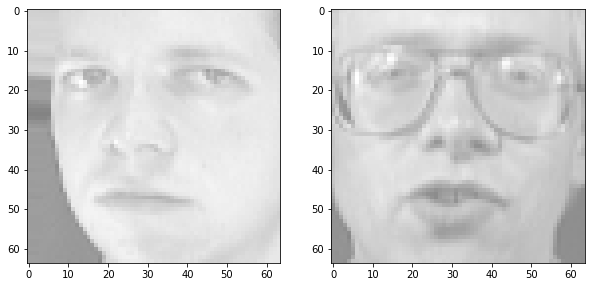

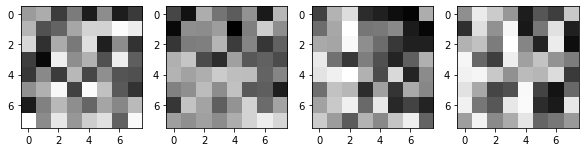

In [15]:
# visualize the four filters we learned

# we plot two sample images from the data set
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0] = plot_face(ax[0], X[Y == 0][0], image_shape)
ax[1] = plot_face(ax[1], X[Y == 1][0], image_shape)
plt.show()

# using plot_face() function to visualize the four (8,8) filters cnn_model learned
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0] = plot_face(ax[0], cnn_model.layers[0].get_weights()[0][:, :, :, 0].flatten(), (8, 8))
ax[1] = plot_face(ax[1], cnn_model.layers[0].get_weights()[0][:, :, :, 1].flatten(), (8, 8))
ax[2] = plot_face(ax[2], cnn_model.layers[0].get_weights()[0][:, :, :, 2].flatten(), (8, 8))
ax[3] = plot_face(ax[3], cnn_model.layers[0].get_weights()[0][:, :, :, 3].flatten(), (8, 8))
plt.show()

### Explain how each filter is applied to the input image

#####  Each (8 x 8) kernel performs convolution operation with smaller (8 x 8) sub-grids of input face image. As a result of this dot product operation, 4 feature Maps are created for 4 different kernels. To understand visually, we can say that the each (8 x 8) kernel moves first horizontally and then vertically on top of (8 x 8) subgrids of each (64 x 64 x 1) face image with 1 step stride size to produce a convolved image of (57 x 57). The 4 kernels with different weights perform the same dot product operation on input face image to produce these resultant 4 feature Maps.

**Task #4:** visualize the output of the convolutional layer and the pooling layer separately. Describe how each layer has transformed the data.

In [16]:
# visualize a training image after it passes through each filter

# using the backend.function in keras
from tensorflow.keras import backend
face_0 = X[Y == 0][0]
get_conv_layer_output = backend.function([cnn_model.layers[0].input],
                                  [cnn_model.layers[0].output])
layer_output = get_conv_layer_output(np.expand_dims(face_0, axis=0))[0]

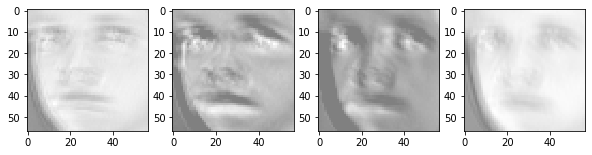

In [17]:
# visualize a training image "face_0" after it passes through the above four filters
conv_output_img_shape = (57,57)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0] = plot_face(ax[0], layer_output[:, :, :, 0].flatten(), conv_output_img_shape)
ax[1] = plot_face(ax[1], layer_output[:, :, :, 1].flatten(), conv_output_img_shape)
ax[2] = plot_face(ax[2], layer_output[:, :, :, 2].flatten(), conv_output_img_shape)
ax[3] = plot_face(ax[3], layer_output[:, :, :, 3].flatten(), conv_output_img_shape)
plt.show()

In [18]:
get_pool_layer_output = backend.function([cnn_model.layers[0].input],
                                  [cnn_model.layers[1].output])
pool_output = get_pool_layer_output(np.expand_dims(face_0, axis=0))[0] 

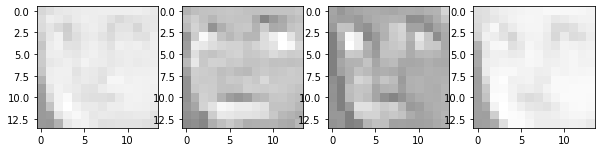

In [19]:
# visualize the training image "boot_x" after it passes through the above four filters + pooling layer
maxp_output_img_shape = (14,14)
fig, ax = plt.subplots(1, 4, figsize=(10, 5))
ax[0] = plot_face(ax[0], pool_output[:, :, :, 0].flatten(), maxp_output_img_shape)
ax[1] = plot_face(ax[1], pool_output[:, :, :, 1].flatten(), maxp_output_img_shape)
ax[2] = plot_face(ax[2], pool_output[:, :, :, 2].flatten(), maxp_output_img_shape)
ax[3] = plot_face(ax[3], pool_output[:, :, :, 3].flatten(), maxp_output_img_shape)
plt.show()

### Describe how each layer has transformed the data.

- In Convolution Layer has 4 filter kernels with dimensions (8 x 8) each, that perform convolution operation with same size (8 x 8) sub grid of input image of dimensions (64 x 64) and move 1 stride in each iteration, first horizontally then vertically. Sum of dot products of corresponding elements is the output of this layer. This results into a smaller size output of dimension (57 x 57) each for 4 filters which has been visualized as the output of the convolution layer. The non-linear activation function 'relu' gives outputs that are greater than 0.
- MaxPooling2D Layer has a pool_size of (4 x 4) which means that for every (4 x 4) sub-matrix moving with 1 stride on (57 x 57) image output of convoliton layer a maximum value from these 4 elements will be resulting into output of this layer. This will reduce the convoluted image from (57 x 57) into (14 x 14) image output for each of the 4 filter kernels.
- These (14 x 14 x 4) are flattened into a single vector array with **784** values which passes through 4 hidden layers that are able to learn features and representations through a connected neural network. The classifier can then recognize these sub-patterns in more faces images dataset.

## Recommended:
- To visually and theoretically understand working of CNN would recommend to read [Convolution Neural Networks vs Fully Connected Neural Networks](https://medium.datadriveninvestor.com/convolution-neural-networks-vs-fully-connected-neural-networks-8171a6e86f15)